In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial import distance
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
from scipy.spatial.distance import pdist
from numpy.linalg import norm 
from sklearn.linear_model import LinearRegression

# import n-by-2 matrix as csv file

In [2]:
data = pd.read_csv("matrixnby2.csv")

In [3]:
matrix = np.array(data)

# Kmeans to identify clusters and plot 

In [4]:
#kmeans to identify clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(matrix)
y_kmeans = kmeans.predict(matrix)

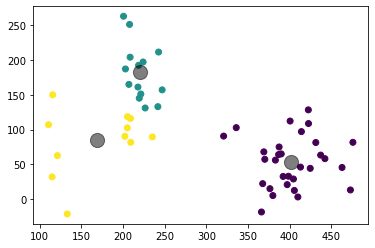

In [5]:
#plot clusters and cluster centers
plt.scatter(matrix[:, 0], matrix[:, 1], c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# MST

In [6]:
distances_edges = pdist(centers, 'euclidean')
distances_edges

array([222.44557715, 234.98378491, 110.33066725])

In [7]:
#generate matrix of nodes and edges 
edge_matrix = np.zeros((len(centers), len(centers)))

for i in range(len(centers)-1):
    for j in range(i+1, len(centers)):
        edge_matrix[i][j] = distance.euclidean(centers[i],centers[j])
        
print(edge_matrix)



[[  0.         222.44557715 234.98378491]
 [  0.           0.         110.33066725]
 [  0.           0.           0.        ]]


In [8]:
matrix_mst = csr_matrix(edge_matrix + edge_matrix.T) #generate adjacency matrix for MST
MST = minimum_spanning_tree(matrix_mst)
MST.toarray().astype(int) #MST matrix

array([[  0, 222,   0],
       [  0,   0, 110],
       [  0,   0,   0]])

In [9]:
#find x and y for plotting the edges
x = []
y = []
for i in range(len(centers)):
    for j in range(i+1, len(centers)):
        x_points = (centers[i][0], centers[j][0])
        y_points = (centers[i][1], centers[j][1])
        x.append(x_points)
        y.append(y_points)
print(x,y)

[(402.0692995912912, 220.3656859587487), (402.0692995912912, 169.0900494228286), (220.3656859587487, 169.0900494228286)] [(53.85344493516414, 182.17270142572596), (53.85344493516414, 84.48101686285753), (182.17270142572596, 84.48101686285753)]


In [10]:
#looking for non-zero elements of the MST matrix
MST.nonzero()

(array([0, 1], dtype=int32), array([1, 2], dtype=int32))

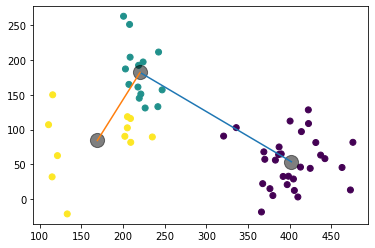

In [11]:
plt.scatter(matrix[:, 0], matrix[:, 1], c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

#deciding edges according to the MST matrix
plt.plot(x[0], y[0])
plt.plot(x[2], y[2])

plt.show()

# Projection

In [12]:
#find the labels to identify cells in different clusters
labels = kmeans.labels_
labels

array([2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [13]:
#find the position of each cell
c1_points_position = list(np.where(labels == 0)[0])
c2_points_position = list(np.where(labels == 1)[0])
c3_points_position = list(np.where(labels == 2)[0])

#find the edges that connect two cluster centers
v12 = centers[1].reshape(-1,1)-centers[0].reshape(-1,1)
v23 = centers[2].reshape(-1,1)-centers[1].reshape(-1,1)

In [14]:
#projection for cluster 1
project_value_list1 = []
for ele in c1_points_position:
    x1 = matrix[ele].reshape(-1,1) 
    project_value1 = (v12.T@(x1))/(v12.T@v12)*v12
    project_value_list1.append(project_value1)
print(project_value_list1)

[array([[ 229.51532943],
       [-162.08393349]]), array([[ 253.00482218],
       [-178.67223453]]), array([[ 253.88121771],
       [-179.29114585]]), array([[ 279.10731837],
       [-197.10584098]]), array([[ 255.09547428],
       [-180.14865494]]), array([[ 261.90876617],
       [-184.96020785]]), array([[ 220.00156108],
       [-155.36530166]]), array([[ 251.02538127],
       [-177.27435157]]), array([[ 267.7345555 ],
       [-189.07438555]]), array([[ 250.43545514],
       [-176.85774521]]), array([[ 221.39532635],
       [-156.34957995]]), array([[ 244.00366705],
       [-172.31561063]]), array([[ 287.44832078],
       [-202.99626444]]), array([[ 214.36282721],
       [-151.38322269]]), array([[ 229.03390647],
       [-161.74395215]]), array([[ 230.80055588],
       [-162.99156157]]), array([[ 256.28831273],
       [-180.99103853]]), array([[ 246.28813174],
       [-173.92890166]]), array([[ 175.64750287],
       [-124.04242559]]), array([[ 230.57595713],
       [-162.83294973]]),

In [15]:
#projection for cluster 1
project_value_list3 = []
for ele in c3_points_position:
    x3 = matrix[ele].reshape(-1,1) 
    project_value3 = (v23.T@(x3))/(v23.T@v23)*v23
    project_value_list3.append(project_value3)
print(project_value_list3)

[array([[19.98280929],
       [38.07177119]]), array([[ 86.66778429],
       [165.12173063]]), array([[51.9256097 ],
       [98.93003044]]), array([[37.97231077],
       [72.34584017]]), array([[ 67.9078118 ],
       [129.37974012]]), array([[ 87.58064714],
       [166.86094083]]), array([[ 78.79925681],
       [150.13040617]]), array([[ 92.83693615],
       [176.87536021]]), array([[ 93.11806255],
       [177.41096957]]), array([[ 86.50298336],
       [164.8077476 ]]), array([[ 80.8503301 ],
       [154.03816467]])]


In [16]:
#projection for cluster 2
for ele in c2_points_position:
    d1 = np.linalg.norm(matrix[ele] - centers[0])
    d2 = np.linalg.norm(matrix[ele] - centers[2])
    x2 = matrix[ele].reshape(-1,1) 
    if d1 < d2:
        project_value12 = (v12.T@(x2))/(v12.T@v12)*v12
        project_value_list1.append(project_value12)
    else:
        project_value23 = (v23.T@(x2))/(v23.T@v23)*v23
        project_value_list3.append(project_value23)


In [17]:
project_value_list_x1 = [item[0] for item in project_value_list1]
project_value_list_y1 = [item[1] for item in project_value_list1]

project_value_list_x3 = [item[0] for item in project_value_list3]
project_value_list_y3 = [item[1] for item in project_value_list3]

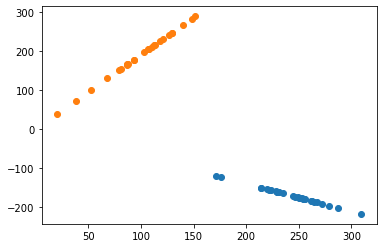

In [18]:
plt.scatter(project_value_list_x1,project_value_list_y1)
plt.scatter(project_value_list_x3,project_value_list_y3)

plt.show()

In [19]:
project_value_list_x = np.concatenate((project_value_list_x1, project_value_list_x3))
project_value_list_y = np.concatenate((project_value_list_y1, project_value_list_y3))

In [20]:
position_x = np.argsort(project_value_list_x.T)
position_y = np.argsort(project_value_list_y.T)

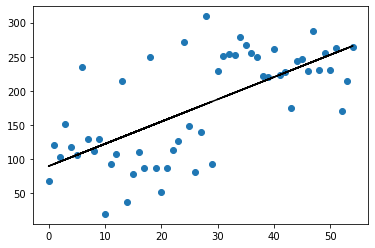

In [21]:
#pseudotime by x
modelx = LinearRegression()
modelx.fit(position_x.T,project_value_list_x)
plt.scatter(position_x.T,project_value_list_x)
plt.plot(position_x.T, modelx.predict(position_x.T),color='k')

plt.show()

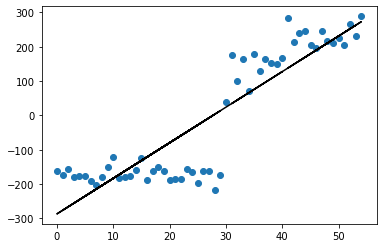

In [22]:
#pseudotime by y
modely = LinearRegression()
modely.fit(position_y.T,project_value_list_y)
plt.scatter(position_y.T,project_value_list_y)
plt.plot(position_y.T, modely.predict(position_y.T),color='k')

plt.show()

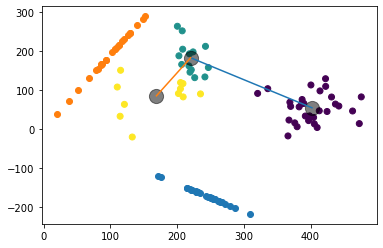

In [23]:
plt.scatter(project_value_list_x1,project_value_list_y1)
plt.scatter(project_value_list_x3,project_value_list_y3)
plt.scatter(matrix[:, 0], matrix[:, 1], c=y_kmeans)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)


plt.plot(x[0], y[0])
plt.plot(x[2], y[2])

plt.show()


plt.show()